# CAR PRICE PREDICTION MACHINE LEARNING PROJECT BY HRITIK PAL

In [1]:
#importing important libraries for data ingestion and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data ingestion
df=pd.read_csv("D:\Microsoft Edges Downloads\CarPrice_Dataset.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### EXPLORATORY DATA ANALYSIS OF THE DATASET

In [4]:
#checking columns in the dataset
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
#checking datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#checking is there any null value in the dataset -> no null value found
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
#checking is there any duplicate value in the dataset -> no duplicate value found
df.duplicated().sum()

0

In [8]:
#deleting columns which are of no use in the dataset
df.drop(labels="car_ID",axis=1,inplace=True)

In [9]:
#checking number of rows and columns in the dataset
df.shape

(205, 25)

In [10]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<AxesSubplot:>

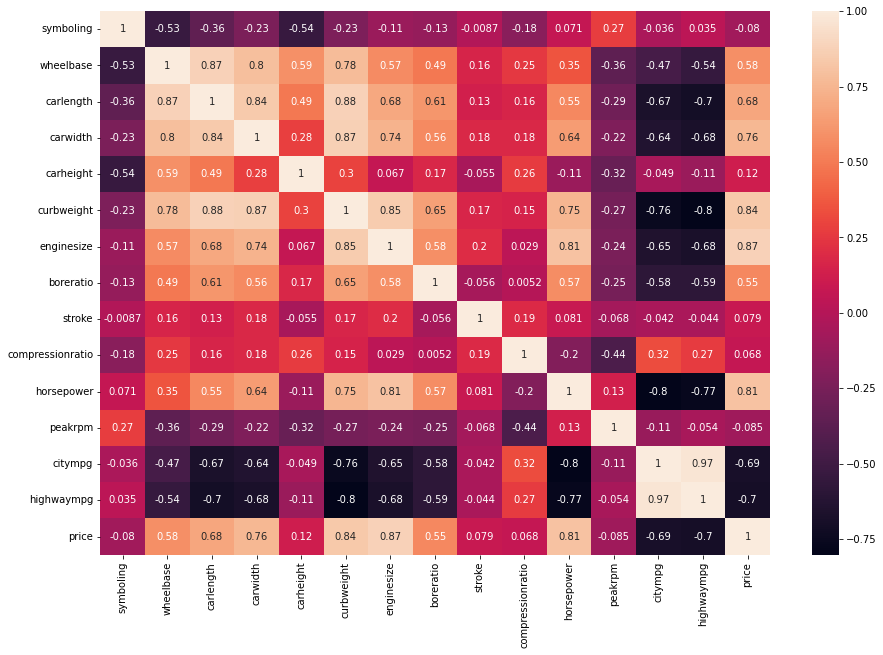

In [11]:
#checking collinearity in the dataset -> there's no such high collinearity in the columns of the dataset
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'insights from fuel type column in the dataset')

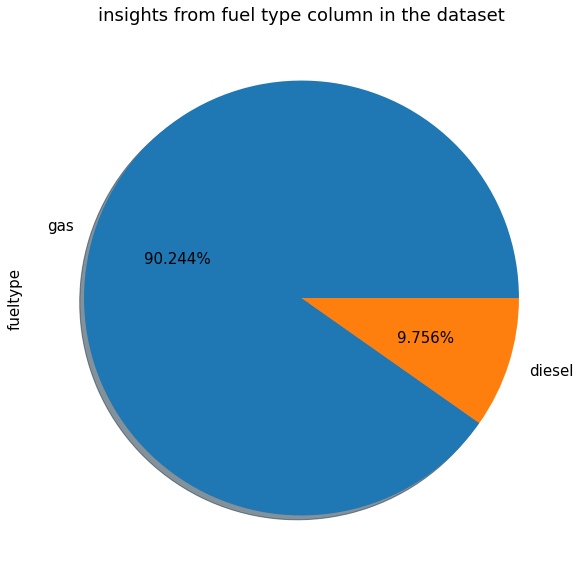

In [12]:
#interpreting insights from fueltype column -> majority(90.2%) of the vehicles has gas as its fuel type
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,10))
df["fueltype"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("insights from fuel type column in the dataset")

Text(0.5, 1.0, 'insights from doornumber column in the dataset')

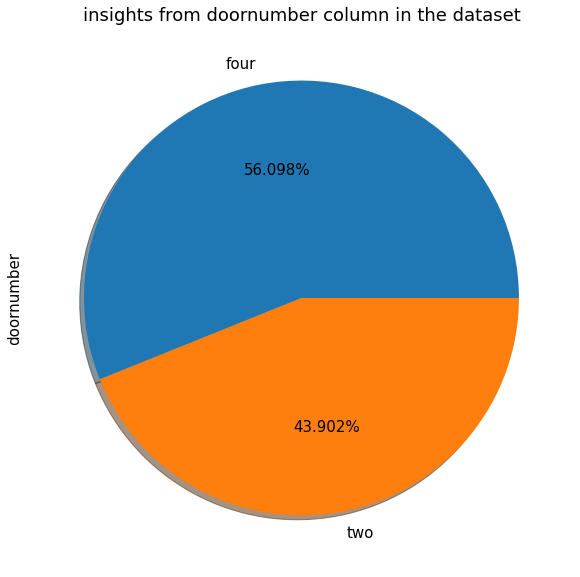

In [13]:
#fetching insights from doornumber column from the dataset-> majority(56.1%) of the vehicles has 4 doors
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,10))
df["doornumber"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("insights from doornumber column in the dataset")

Text(0.5, 1.0, 'insights from fuelsystem column in the dataset')

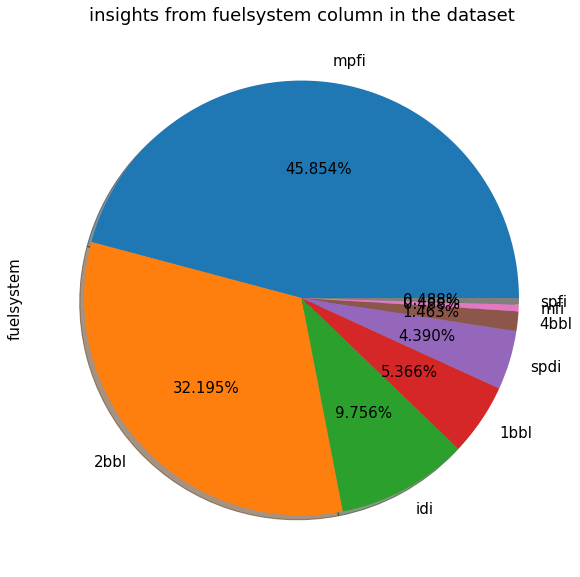

In [14]:
#fetching insights from fuelsystem column from the dataset-> majority(45.85%) of the vehicles has mpfi as its fuelsystem
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,10))
df["fuelsystem"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("insights from fuelsystem column in the dataset")

Text(0.5, 1.0, 'insights from carbody column in the dataset')

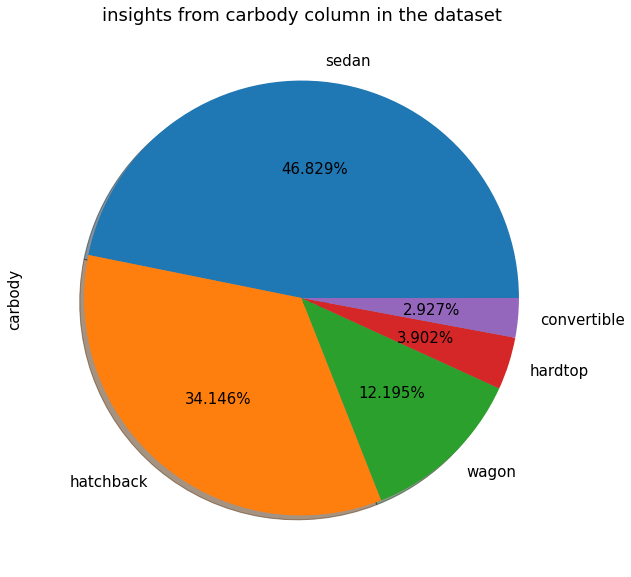

In [15]:
#fetching insights from carbody column from the dataset-> majority(46.83%) of the vehicles are sedan under carbody category
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,10))
df["carbody"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("insights from carbody column in the dataset")

Text(0.5, 1.0, 'insights from enginetype column in the dataset')

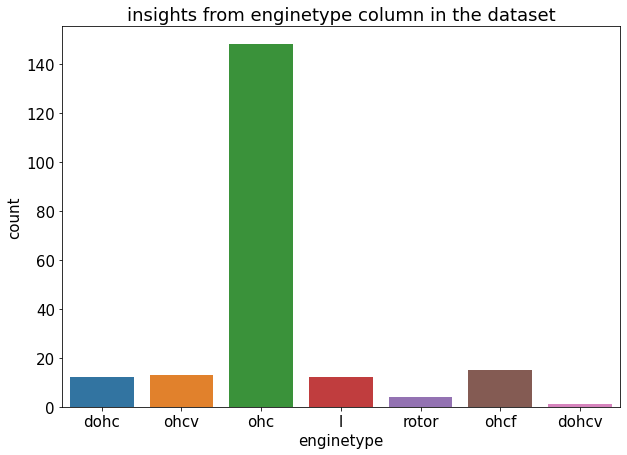

In [16]:
#fetching insights from enginetype column from the dataset-> majority(148) of the vehicles have ohc as its enginetype
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,7))
sns.countplot(x='enginetype', data=df)
plt.title("insights from enginetype column in the dataset")

Text(0.5, 1.0, 'insights from enginelocation column in the dataset')

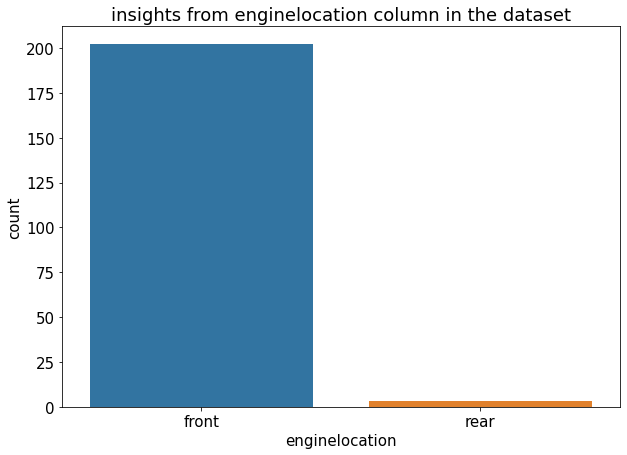

In [17]:
#fetching insights from enginelocation column from the dataset-> majority(202) of the vehicles have their enginelocation in the front
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,7))
sns.countplot(x='enginelocation', data=df)
plt.title("insights from enginelocation column in the dataset")

Text(0.5, 1.0, 'insights from aspiration column in the dataset')

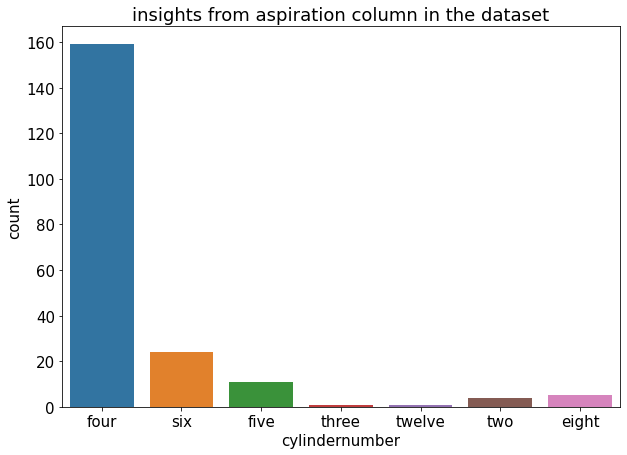

In [18]:
#fetching insights from cylindernumber column from the dataset-> majority(159) of the vehicles have cylindernumber as four
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,7))
sns.countplot(x='cylindernumber', data=df)
plt.title("insights from aspiration column in the dataset")

Text(0.5, 1.0, 'insights from enginesize column in the dataset')

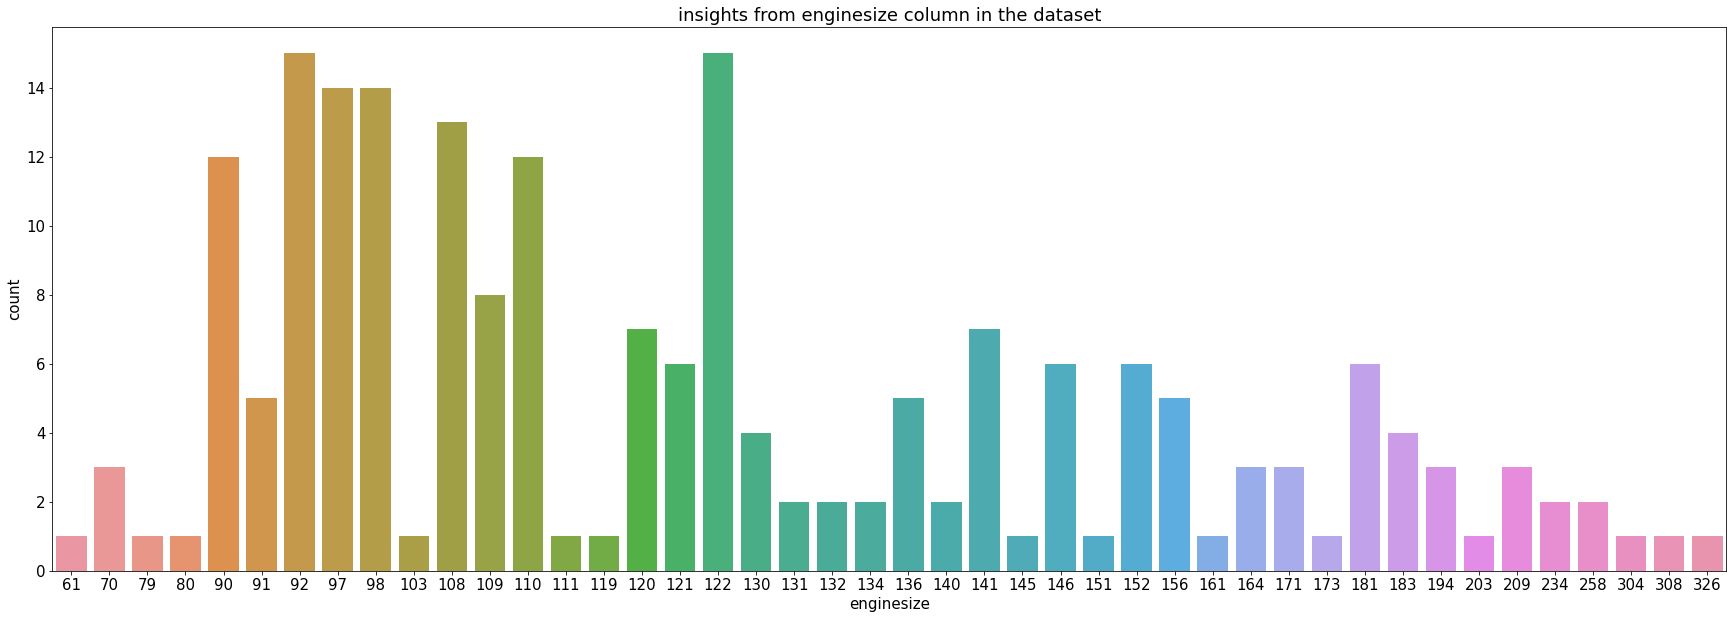

In [19]:
#fetching insights from enginesize column from the dataset-> majority(15) of the vehicles have enginesize as 122

plt.figure(figsize=(30,10))
sns.countplot(x='enginesize', data=df)
plt.title("insights from enginesize column in the dataset")

Text(0.5, 1.0, 'insights from horsepower column in the dataset')

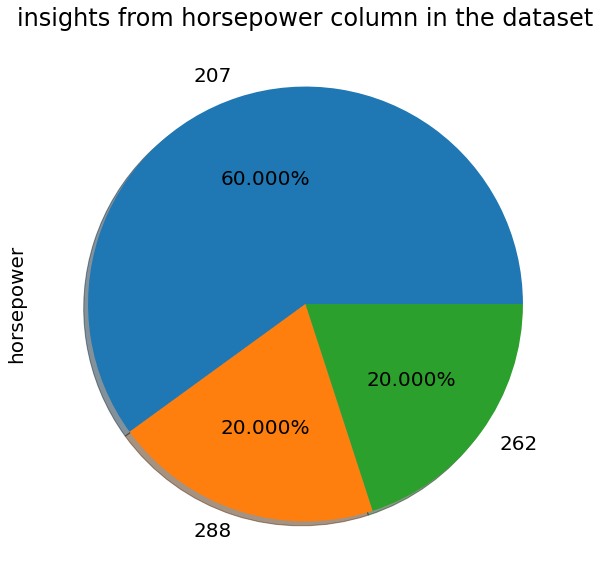

In [20]:
#fetching insights from horsepower column from the dataset-> majority(60%) of the vehicles have horsepower as 207
ab=df['horsepower'].nlargest(n=5)
ab=pd.DataFrame(ab)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(50,10))
ab["horsepower"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("insights from horsepower column in the dataset")

Text(0.5, 1.0, 'insights from peakrpm column in the dataset')

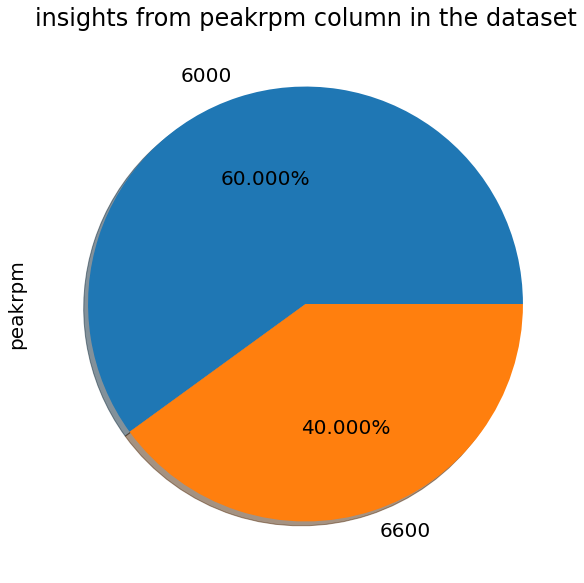

In [21]:
#fetching insights from peakrpm column from the dataset-> majority(60%) of the vehicles have peakrpm as 6000
ab1=df['peakrpm'].nlargest(n=5)
ab1=pd.DataFrame(ab1)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(50,10))
ab1["peakrpm"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("insights from peakrpm column in the dataset")

Text(0.5, 1.0, 'insights from aspiration column in the dataset')

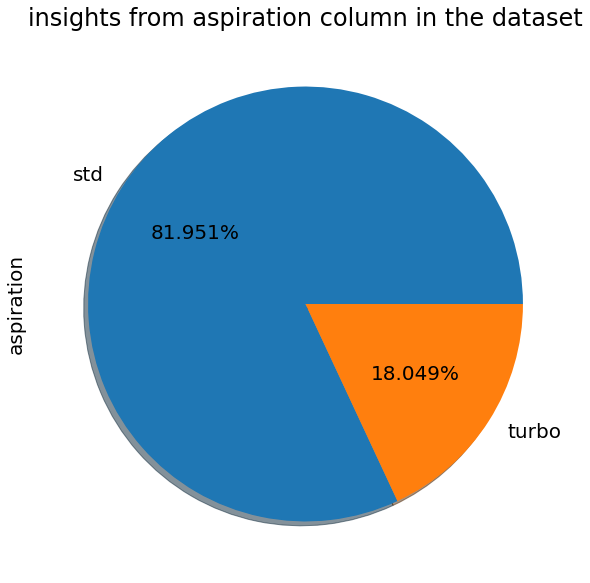

In [22]:
#fetching insights from aspiration column from the dataset-> majority(81.95%) of the vehicles are std under aspiration category
plt.figure(figsize=(10,10))
df["aspiration"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("insights from aspiration column in the dataset")

C:\Users\Hritik Pal\Anaconda3\envs\New project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


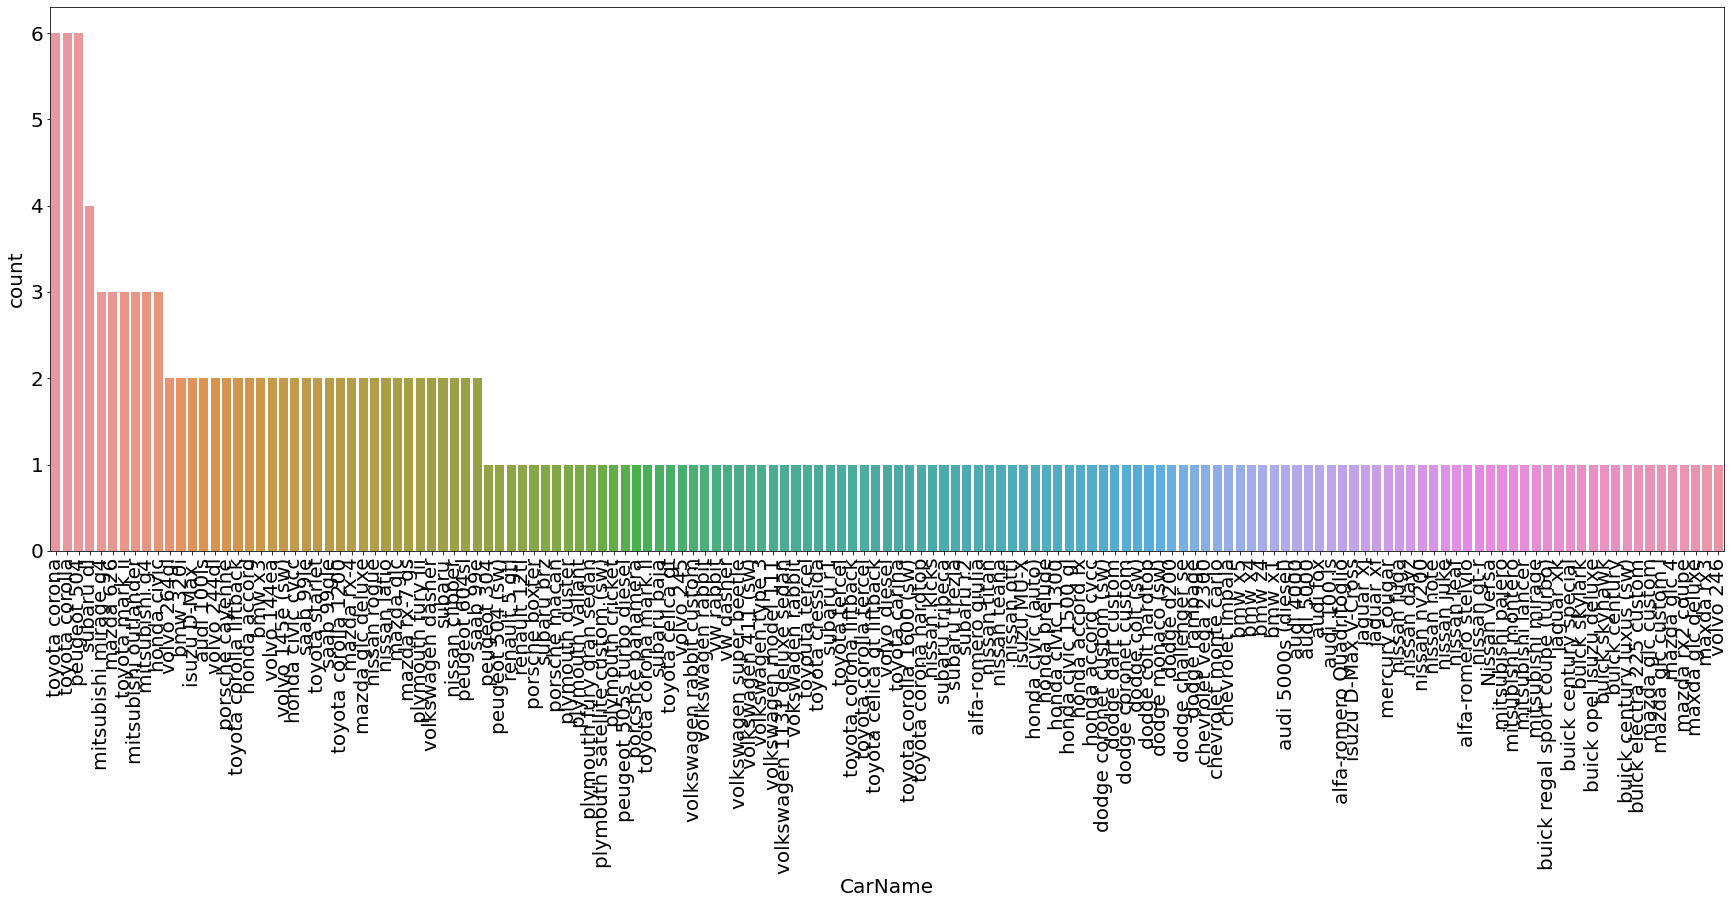

In [23]:
#fetching insights from CarName column from the dataset-> majority(6) of the vehicles are toyota corona
plt.figure(figsize = [30, 10])
sns.countplot(df["CarName"],order = df["CarName"].value_counts().index)
plt.xticks(rotation=90)
plt.show()


# ANALYSIS REPORT

- The data has 205 rows and 25 columns
- There's no null and duplicate value in the dataset
- The most favourite car is Toyota Corona 
- Majority of the vehicles have its fueltype as gas
- Majority of the vehicles have 4 Doors
- Majority of the vehicles has mpfi as its fuelsystem
- Majority of the vehicles are sedan under carbody category
- Majority of the vehicles have ohc as its enginetype
- Majority of the vehicles have their enginelocation in the front
- Majority of the vehicles have cylindernumber as four
- Majority of the vehicles have enginesize as 122
- Majority of the vehicles have horsepower as 207
- Majority of the vehicles have peakrpm as 6000
- Majority of the vehicles are std under aspiration category
- Majority of the vehicles are toyota corona



# MODEL BUILDING 

In [24]:
#importing important libraries for model building and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [25]:
new_df=df.copy()

In [26]:
#seperating numerical column and categorical column
cat = []
num = []
for i in new_df.columns:
    if new_df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=new_df[num]   # new dataframe just type numeric
data_c=new_df[cat]  # new dataframe just type object

In [27]:
#storing column names of categorical datatype column
col=data_c.columns
col

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [28]:
label_encoders = {}
categorical_columns = data_c.columns  

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

C:\Users\Hritik Pal\AppData\Local\Temp\ipykernel_11372\2995813572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[column] = label_encoders[column].fit_transform(data_c[column])


In [29]:
#concatenating data_c and data_n
frames = [data_c, data_n]
  
data1 = pd.concat(frames,axis=1)
data1.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
#checking the changed datatypes of the column for training and test of the model
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    int32  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   enginetype        205 non-null    int32  
 8   cylindernumber    205 non-null    int32  
 9   fuelsystem        205 non-null    int32  
 10  symboling         205 non-null    int64  
 11  wheelbase         205 non-null    float64
 12  carlength         205 non-null    float64
 13  carwidth          205 non-null    float64
 14  carheight         205 non-null    float64
 15  curbweight        205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [31]:
#checking the shape of the dataset again
data1.shape

(205, 25)

In [32]:
#checking the correlation between other columns and the price column
data1.corr()["price"].sort_values()

highwaympg         -0.697599
citympg            -0.685751
CarName            -0.231439
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
symboling          -0.079978
doornumber         -0.031835
cylindernumber     -0.027628
enginetype          0.049171
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
aspiration          0.177926
enginelocation      0.324973
fuelsystem          0.526823
boreratio           0.553173
wheelbase           0.577816
drivewheel          0.577992
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

In [33]:
#feature selection- selecting only useful columns which are highly correlated with the price column or dependent column

data1=data1[["highwaympg","citympg","CarName",'enginelocation','fuelsystem','boreratio','wheelbase','drivewheel','carlength','carwidth','horsepower','curbweight','enginesize','price']]

data1.head()

,highwaympg,citympg,CarName,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
0,27,21,2,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,13495.0
1,27,21,3,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,16500.0
2,26,19,1,0,5,2.68,94.5,2,171.2,65.5,154,2823,152,16500.0
3,30,24,4,0,5,3.19,99.8,1,176.6,66.2,102,2337,109,13950.0
4,22,18,5,0,5,3.19,99.4,0,176.6,66.4,115,2824,136,17450.0


In [34]:
X = data1.drop(columns="price")           
y = data1["price"]   

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [35]:
#Standardization
scaler=StandardScaler()
scaler.fit_transform(X)

array([[-0.54605874, -0.64655303, -1.83822103, ...,  0.17448278,
        -0.01456628,  0.07444893],
       [-0.54605874, -0.64655303, -1.81377978, ...,  0.17448278,
        -0.01456628,  0.07444893],
       [-0.69162706, -0.95301169, -1.86266229, ...,  1.26453643,
         0.51488192,  0.60404617],
       ...,
       [-1.12833203, -1.10624102,  1.53467254, ...,  0.75753473,
         0.87875722,  1.10957081],
       [-0.54605874,  0.11959362,  1.58355505, ...,  0.04773235,
         1.27343679,  0.43553795],
       [-0.83719538, -0.95301169,  1.60799631, ...,  0.25053303,
         0.97502053,  0.33924755]])

In [36]:
#different ML algorithms
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
XGB = XGBRegressor()

In [37]:
#checking best ML Algorithm for best model prediction
li = [LR,DTR,RFR,XGB]
q = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    q.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 82.58321392628886
DecisionTreeRegressor() : 87.98566714210543
RandomForestRegressor() : 92.40386708529736
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) : 91.33996878863752


# FINAL RESULT OF THE MODEL

The best regression model for car price prediction dataset is Random Forest Regressor.

# THANK YOU!